### Implementing Heap Sort and Counting Sort for Large Datasets

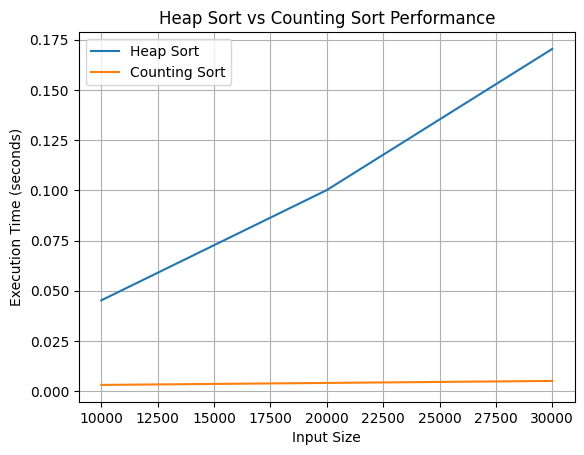

In [1]:
import time
import random
import matplotlib.pyplot as plt

def heapify(arr, n, i):
    largest = i
    l = 2*i + 1
    r = 2*i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n//2 - 1, -1, -1):
        heapify(a, n, i)
    for i in range(n-1, 0, -1):
        a[0], a[i] = a[i], a[0]
        heapify(a, i, 0)
    return a

def counting_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    count = [0] * (max_val + 1)
    for num in arr:
        count[num] += 1
    output = []
    for i in range(len(count)):
        output.extend([i] * count[i])
    return output

sizes = [10000, 20000, 30000]
heap_times = []
count_times = []

for size in sizes:
    data = [random.randint(1, 10000) for _ in range(size)]

    start = time.time()
    heap_sort(data)
    heap_times.append(time.time() - start)

    start = time.time()
    counting_sort(data)
    count_times.append(time.time() - start)

plt.plot(sizes, heap_times, label='Heap Sort')
plt.plot(sizes, count_times, label='Counting Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Heap Sort vs Counting Sort Performance')
plt.legend()
plt.grid(True)
plt.show()
